In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from harpia.filters import filters
import harpia.filters.filtersChunked as filtersChunked
from harpia.threshold.thresholdChunked import gaussianThreshold, meanThreshold
from harpia.threshold import threshold
from harpia.quantification import quantification


# Function to check if two circles overlap
def circles_overlap(x1, y1, r1, x2, y2, r2):
    return (x2 - x1) ** 2 + (y2 - y1) ** 2 < (r1 + r2) ** 2


def create_circles(width=256, height=256, num_circles=10, min_radius=3, max_radius=5):
    circles = []
    image = np.zeros((height, width), dtype=np.int32)
    for _ in range(num_circles):
        # Random position
        count = 0
        while True:
            x = np.random.randint(max_radius, width - max_radius)
            y = np.random.randint(max_radius, height - max_radius)

            # Check if the new circle overlaps with any existing circle
            # overlap = False
            # for circle in circles:
            #    if circles_overlap(x, y, max_radius, circle[0], circle[1], circle[2]):
            #        overlap = True
            #        break

            # if not overlap:
            #    break

            if count > num_circles:
                break

            count = count + 1

        # Random radius and intensity
        radius = np.random.randint(min_radius, max_radius)
        intensity = np.random.normal(0, scale=1e6)  # Signed integer intensity

        # Draw the circle on the image
        yy, xx = np.ogrid[:height, :width]
        circle_mask = (xx - x) ** 2 + (yy - y) ** 2 <= radius**2
        image[circle_mask] = 1

        # Save circle information for future checks
        circles.append((x, y, radius))
    return np.random.normal(image, scale=0)


def contiguous(array: np.ndarray) -> np.ndarray:
    if array.dtype != np.int32:
        array = np.ascontiguousarray(array.astype(np.int32))
    elif not array.flags["C_CONTIGUOUS"]:
        array = np.ascontiguousarray(array)
    return array


# path = "/home/ricardo.grangeiro/Codes/algorithms/filters/tests/ILSIMG_600x1520x1520_16bits.raw"
# image = contiguous(np.fromfile(path,dtype=np.uint16).reshape(1520,1520,600))
# output = contiguous(np.zeros_like(image))

In [2]:
z, x, y = 2, 50, 50
#img2d = create_circles(width=x, height=y)
#stack = np.vstack([img2d[np.newaxis, ...] for _ in range(z)])
#img = contiguous(stack)
#out = np.ascontiguousarray(np.zeros_like(img).astype(np.float32))

img = np.fromfile("../example_images/crua_A_190x207x100_16b.raw",dtype=np.uint16).reshape(100,207,190)
#img = img.reshape(1,207,190)
out = np.ascontiguousarray(np.zeros_like(img).astype(np.float32))

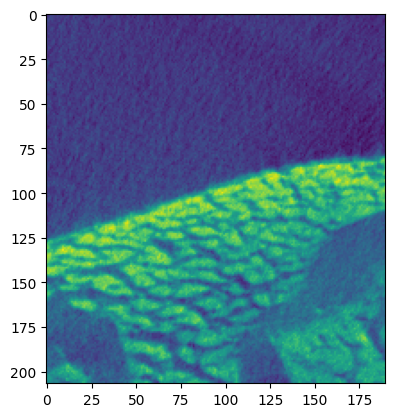

In [3]:
plt.imshow(img[0])

In [41]:
#filters.gaussianFilter(img, out, 10, 1,1,1)
#out = filtersChunked.logFilter(img.astype(np.float32),out,gpuMemory=0.2,verbose=1,type3d=1)
#out = filtersChunked.prewittFilter(img.astype(np.float32),out,gpuMemory=1,verbose=1,type3d=0)
#out = filtersChunked.sobelFilter(img.astype(np.float32),out,gpuMemory=0.2,verbose=1,type3d=0)
#out = filtersChunked.unsharpMaskFilter(img,out,verbose=1,gpuMemory=1)
out = filtersChunked.meanFilter(img.astype(np.float32),out,windowSize=3, type3d=0)
#filters.nonLocalMeansFilter(img,out.astype(np.float64),3,5,100,axis=1)
#out = filtersChunked.gaussianFilter(img.astype(np.float32),out)
#out = gaussianThreshold(img.astype(np.float32), out,sigma=11,type3d=0)
out = meanThreshold(img.astype(np.float32), out, windowSize=11,type3d=1)
#filters.canny(img*10,out,x,y,z,1,100,1000) 

Elapsed time: 1513 microseconds
2d variant


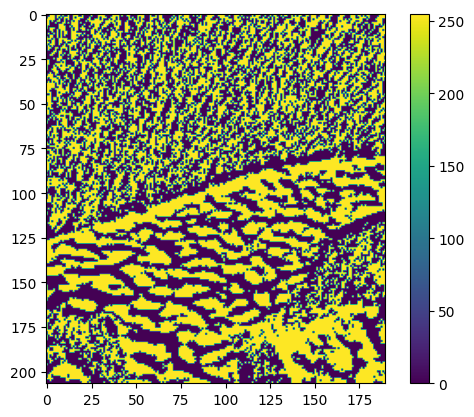

In [42]:
plt.colorbar(plt.imshow(out[0]))